使用LDA, 分析yelp数据集

In [1]:
import pandas as pd 

yelp = pd.read_csv('./data/yelp.csv', encoding='utf-8')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 把每个文本表示成count vector. 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(yelp['text'])

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# 把每个文本表示成count vector. 
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(yelp['text'])

# 只是使用下LDA，聚出来的类没啥实际意义
lda = LatentDirichletAllocation(n_topics=10, learning_method='batch', random_state=9)
model = lda.fit(X)

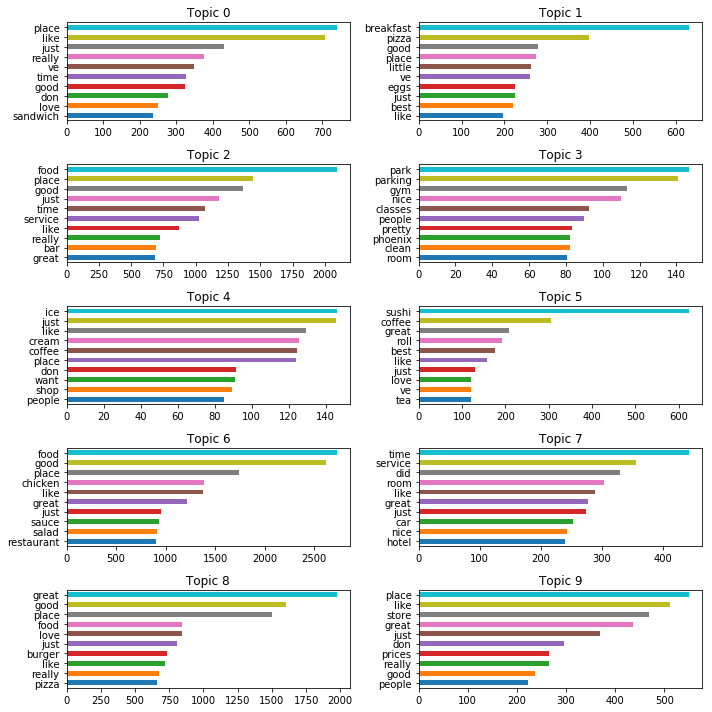

In [21]:
import matplotlib.pyplot as plt

####
# Per topic: (token, pseudocount)
# pseudocount represents the number of times word j was assigned to topic i
# 
# We can to convert these to a normalized form -- well you don't have to
# but it's easier to understand the output in this form.  Also, this is 
# consistent with how Gensim performs.  After some consideration, we will plot these out.
####
def display_topics(model, feature_names, no_words = 10, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):

        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        
        topic_words = [(token, counts)
                       for token, counts in topic[:-no_words - 1:-1]]
        
        topics_tokens.append(topic_words)
        
        if not plot:
            print ("Topic %d:" % (topic_idx))
            print (topic_words)
        
    if plot:
    
        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)
        
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        
        row = 0
        
        for topic_id, topic in enumerate(topics):
            
            column = (0 if topic_id % 2 == 0 else 1)
                
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
            

display_topics(model, vectorizer.get_feature_names(), no_words=10, plot=True)

In [22]:
display_topics(model, vectorizer.get_feature_names(), no_words=10)

Topic 0:
[('place', 739.447921708801), ('like', 708.9472285648228), ('just', 431.31261051979754), ('really', 376.1428623082056), ('ve', 349.09434528656834), ('time', 326.02197661980694), ('good', 323.2653100993834), ('don', 277.7761456385078), ('love', 250.86295326653027), ('sandwich', 236.6507243814213)]
Topic 1:
[('breakfast', 629.455019622789), ('pizza', 397.8103735599957), ('good', 278.5848232908661), ('place', 274.484258419919), ('little', 261.8400752464567), ('ve', 259.2419354809493), ('eggs', 225.68360228508618), ('just', 224.11033404664875), ('best', 221.1683972594351), ('like', 197.21928186888493)]
Topic 2:
[('food', 2090.473513524268), ('place', 1443.275748621843), ('good', 1367.001029981974), ('just', 1181.6559068919264), ('time', 1074.7742558979976), ('service', 1027.994502082337), ('like', 873.9175643316521), ('really', 721.3277532053473), ('bar', 691.6946817091825), ('great', 681.8453878188777)]
Topic 3:
[('park', 146.66366609896147), ('parking', 140.67563262614863), ('gy

In [23]:
comp = model.transform(X)
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
top_topics = document_topics['topic 0'] > 0.8
document_topics[top_topics].head()

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
21,0.871409,0.014287,0.014289,0.014286,0.014288,0.014287,0.014288,0.014288,0.014288,0.014289
79,0.930750,0.007696,0.007695,0.007694,0.007694,0.007694,0.007694,0.007694,0.007694,0.007695
162,0.954985,0.005003,0.005002,0.005001,0.005001,0.005001,0.005005,0.005001,0.005001,0.005001
180,0.801063,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.189632,0.001163
190,0.968958,0.003449,0.003450,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449
